In [63]:
%pip install seaborn

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAysm', 'fM3long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAysm,fM3long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['Class'] = (df['Class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAysm,fM3long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


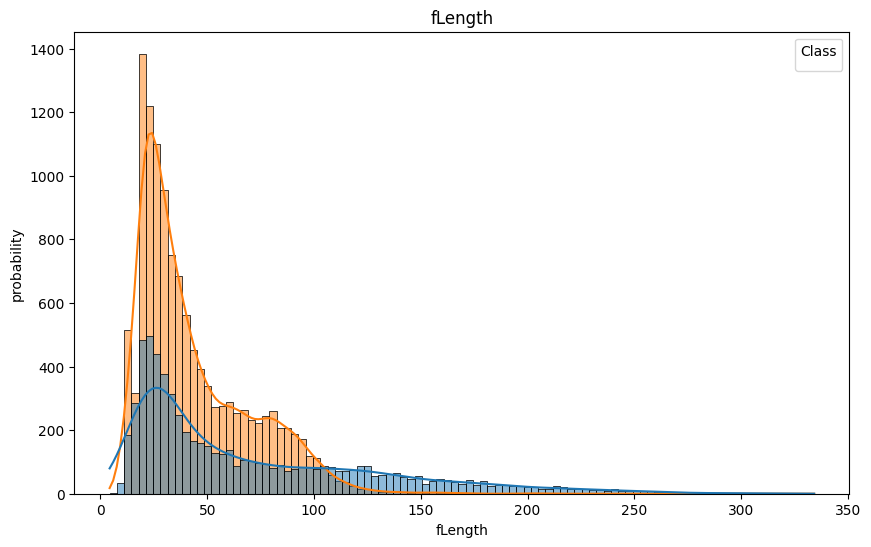

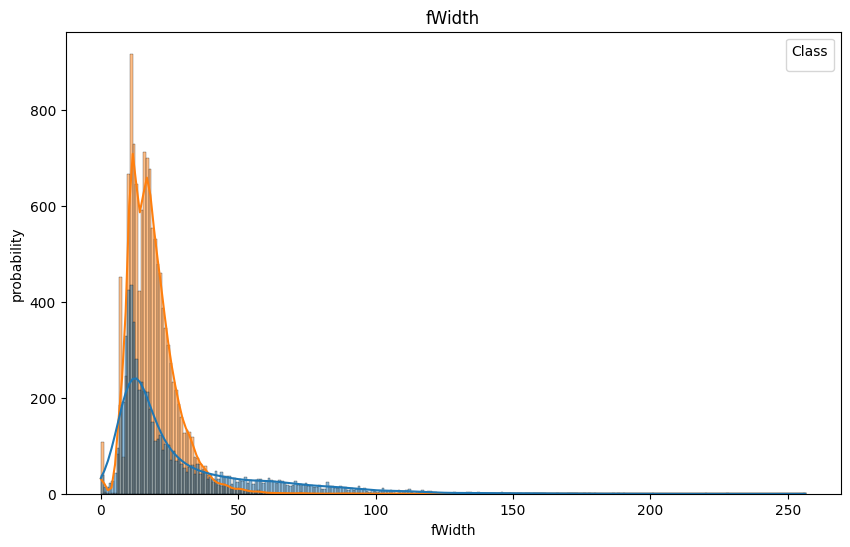

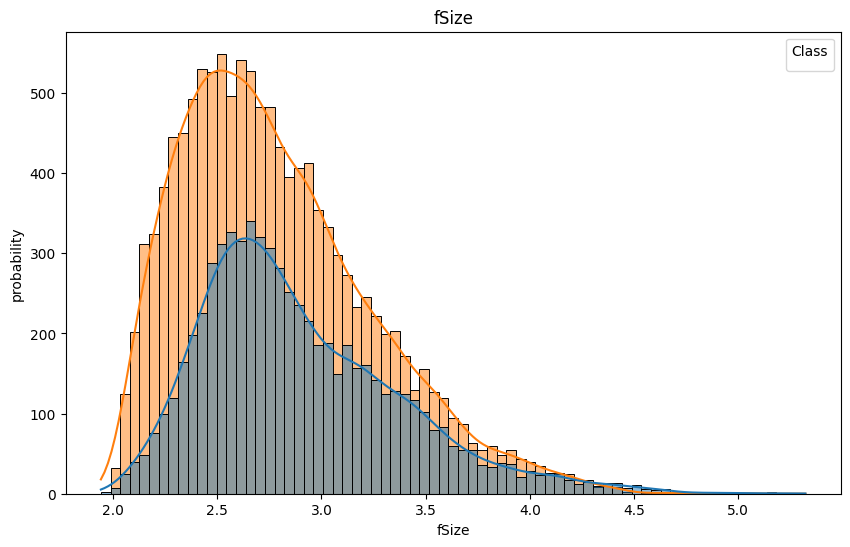

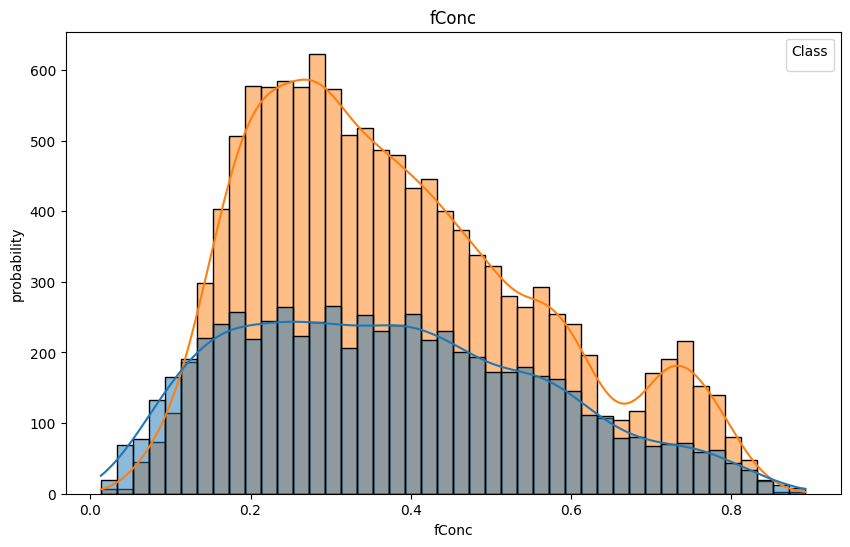

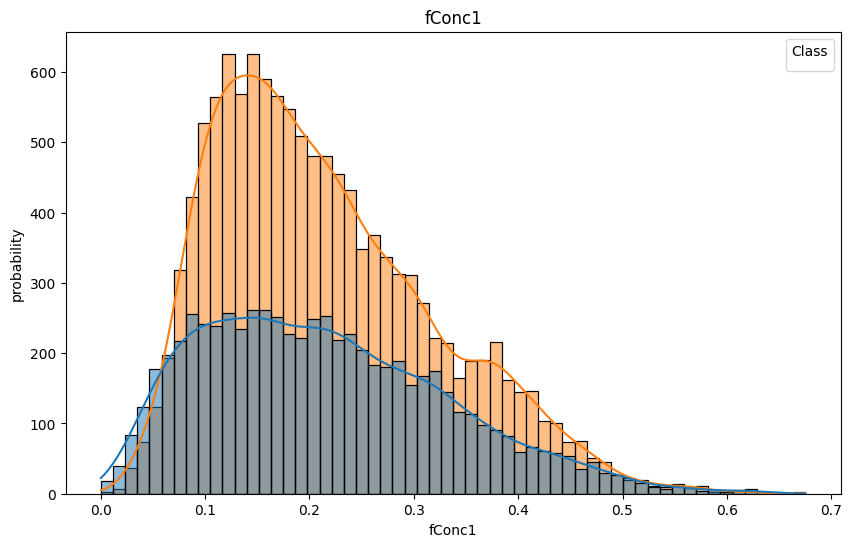

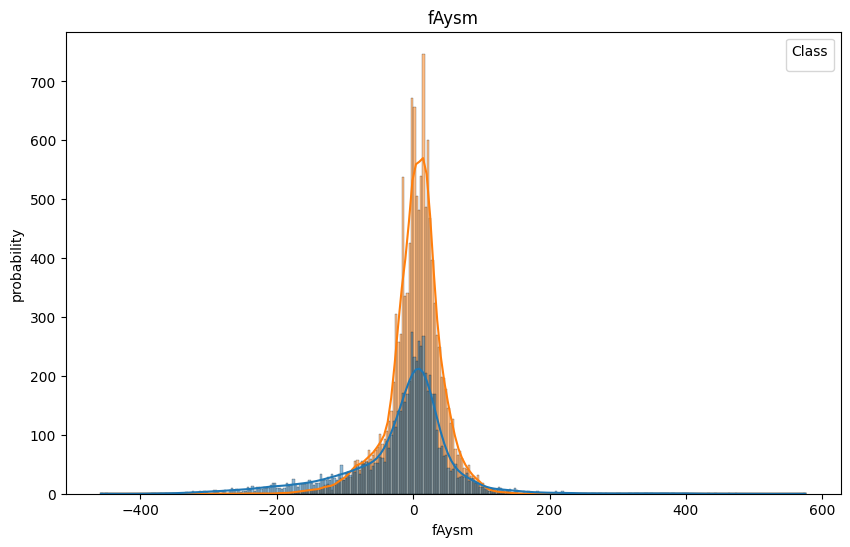

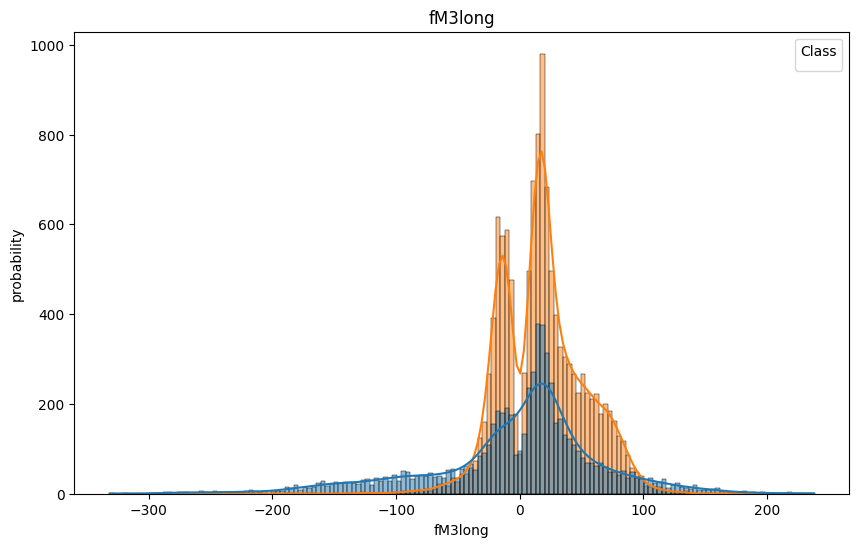

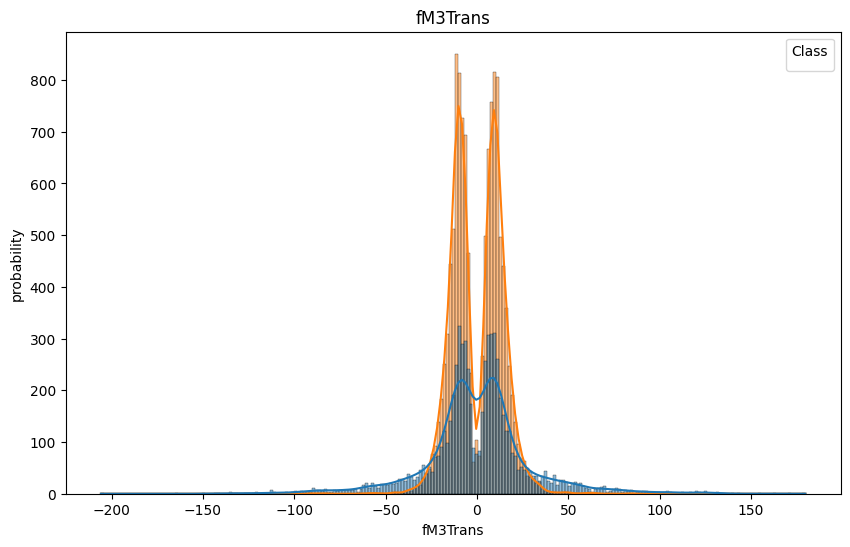

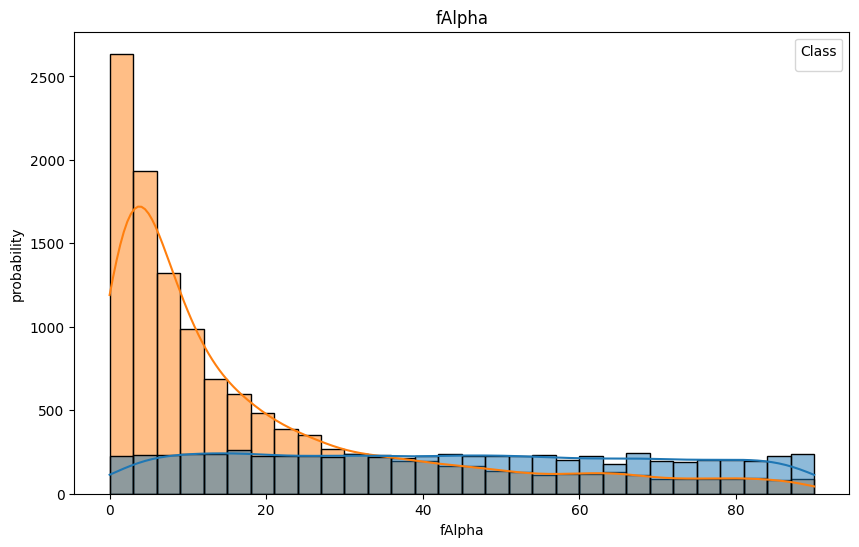

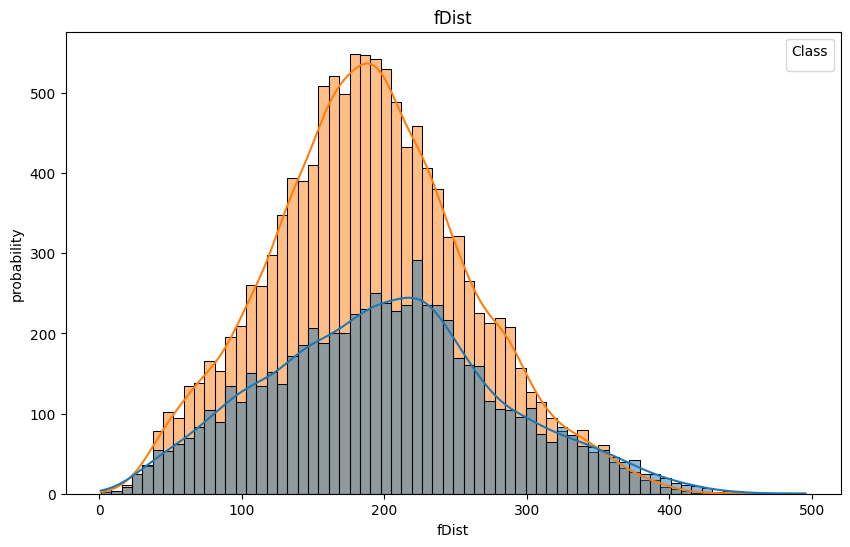

In [68]:
for label in df.columns[:-1] :
  plt.figure(figsize = (10, 6))
  sns.histplot(data = df, x = label, hue = 'Class', kde = True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('probability')
  plt.legend(title = 'Class')
  plt.show()


In [9]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x= pd.DataFrame(x, columns = cols[:-1])
x.head()

,fLength,fWidth,fSize,fConc,fConc1,fAysm,fM3long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [38]:
ros = RandomOverSampler()
x_train, y_train = ros.fit_resample(x_train, y_train)

In [70]:
y_train.shape

(19666,)

In [69]:
print((y_train == 1).sum(), (y_train == 0).sum())

9833 9833


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [71]:
def knn_training (dataframe1, dataframe2, dataframe3, dataframe4) :
  knn_model = KNeighborsClassifier(n_neighbors=5)
  knn_model.fit(dataframe1, dataframe2)
  y_pred = knn_model.predict(dataframe3)
  print(classification_report(dataframe4, y_pred))

In [72]:
knn_training(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1305
           1       0.86      0.86      0.86      2499

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [83]:
def dectree_training (dataframe1, dataframe2, dataframe3, dataframe4) :
  dectree_model = DecisionTreeClassifier(max_leaf_nodes = 50)
  dectree_model.fit(dataframe1, dataframe2)
  y_pred = dectree_model.predict(dataframe3)
  print(classification_report(dataframe4, y_pred))

In [84]:
dectree_training(x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1305
           1       0.88      0.87      0.87      2499

    accuracy                           0.84      3804
   macro avg       0.82      0.82      0.82      3804
weighted avg       0.84      0.84      0.84      3804

